In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
รายชื่อ กองทุน etf ราย sector ของอเมริกา
HealthCare = xlv
ConsumerDiscretionary = xly
Technology = xlk
ConsumerStaples = xlp
Utilities = xlu
Financial = xlf
Industrial = xli
Energy = xle
BasicMaterials = xlb
'''


sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}


Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb','thd']    
#Symbol = Symbol+".BK"

start = '2008/1/1'
end = '2018/12/15'

Price_Data = web.get_data_yahoo(Symbol,start=start,end=end)

In [3]:
Price_Data = Price_Data['Adj Close'].rename(sector_name, axis='columns')
returns_daily = Price_Data.pct_change().dropna()

Text(0.5,1,'Sector Correation')

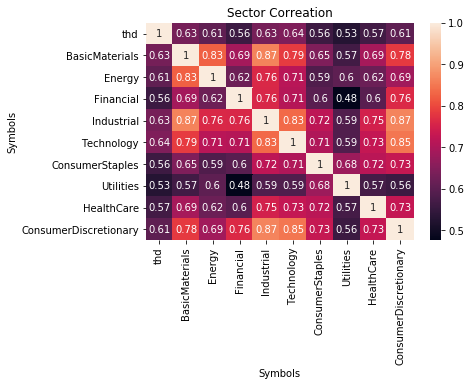

In [4]:
import seaborn as sns

# calculate the correlation matrix
corr = returns_daily.corr()

# plot the heatmap

sns.heatmap(corr, annot=True).set_title("Sector Correation")

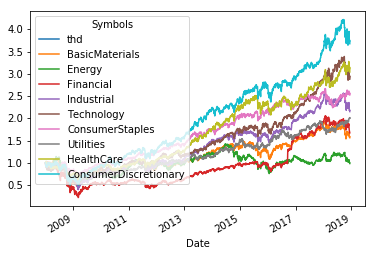

In [5]:
#ผลตอบแทนสะสมเทียบกับ set
#https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/
stock_return = Price_Data.apply(lambda x: x / x[0])
stock_return.plot()

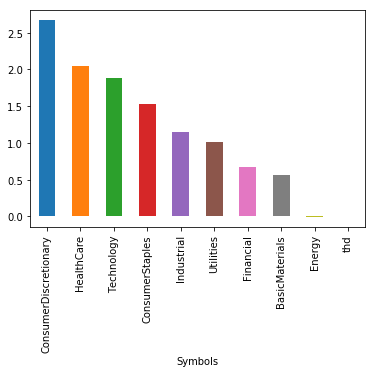

In [6]:
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = stock_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar()

Text(0.5,1,'Correation whit SET')

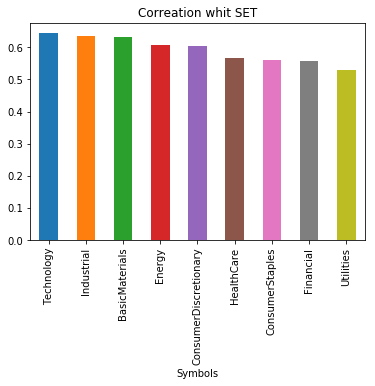

In [7]:
#ความสัมพันธ์กับ set
corr.iloc[0,1:].sort_values(ascending = False).plot.bar().set_title("Correation whit SET")

In [8]:
#หาสมการ ทำนาย set

import statsmodels.api as sm

X = returns_daily.iloc[:,1:10]
y = returns_daily[['thd']]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    thd   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     290.5
Date:                Fri, 28 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:16:49   Log-Likelihood:                 7957.4
No. Observations:                2697   AIC:                        -1.589e+04
Df Residuals:                    2687   BIC:                        -1.584e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.747e-05      0.000      0.112      0.911      -0.000       0.001
BasicMaterials            0.1615      0.037      4.339      0.000       0.088       0.234
Energy                    0.1253      0.025      4.951      0.000       0.076       0.175
Financial                 0.0863      0.018      4.796      0.000       0.051       0.122
Industrial                0.0256      0.048      0.536      0.592      -0.068       0.119
Technology                0.2987      0.040      7.483      0.000       0.220       0.377
ConsumerStaples           0.1153      0.050      2.326      0.020       0.018       0.212
Utilities                 0.1953      0.032      6.130      0.000       0.133       0.258
HealthCare                0.1124      0.038      2.971      0.003       0.038       0.187
ConsumerDiscretionary    -0.0527      0.043     -1.230      0.219      -0.137       0.031
==============================================================================
Omnibus:                      281.608   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2110.372
Skew:                          -0.162   Prob(JB):                         0.00
Kurtosis:                       7.321   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X = returns_daily[['Utilities']]
y = returns_daily[['thd']]
#X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    thd   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1047.
Date:                Fri, 28 Dec 2018   Prob (F-statistic):          1.97e-194
Time:                        17:17:10   Log-Likelihood:                 7482.8
No. Observations:                2697   AIC:                        -1.496e+04
Df Residuals:                    2696   BIC:                        -1.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Utilities      0.8376      0.026     32.365      0.000       0.787       0.888
==============================================================================
Omnibus:                      174.381   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.870
Skew:                          -0.049   Prob(JB):                    1.51e-173
Kurtosis:                       5.659   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
stock_return.iloc[-1]

Symbols
thd                           NaN
BasicMaterials           1.566517
Energy                   0.986651
Financial                1.675613
Industrial               2.152766
Technology               2.882584
ConsumerStaples          2.528326
Utilities                2.013411
HealthCare               3.041909
ConsumerDiscretionary    3.677241
Name: 2018-12-14 00:00:00, dtype: float64